<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_1_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.6_n250.csv',
 'data_add_delta_-1.6_n120.csv',
 'data_add_delta_-1.6_n60.csv',
 'data_add_delta_-1.6_n30.csv',
 'data_add_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.161297,67.801232,31.697672,-0.035340,148.624861,148.646793,-0.021932
1,0.0,1.0,94.610160,54.617527,83.801033,0.001625,243.030345,243.035143,-0.004798
2,0.0,2.0,97.936707,52.208070,38.147672,-0.003774,198.288675,198.292704,-0.004029
3,0.0,3.0,63.723646,34.350812,65.444236,0.049662,173.568356,173.509902,0.058454
4,0.0,4.0,20.507467,81.972146,95.319171,-0.042198,207.756586,207.792400,-0.035814
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,25.590803,23.720255,29.283427,0.102060,88.696544,88.579468,0.117076
119996,999.0,116.0,47.125883,74.237347,56.936271,-0.007821,188.291681,188.293971,-0.002290
119997,999.0,117.0,62.145374,90.851110,27.543284,0.006511,190.546278,190.527998,0.018281
119998,999.0,118.0,68.261596,30.414227,56.612033,-0.063483,165.224374,165.281244,-0.056870


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.161297,67.801232,31.697672,-0.035340,148.624861,148.646793,-0.021932
1,0.0,1.0,94.610160,54.617527,83.801033,0.001625,243.030345,243.035143,-0.004798
2,0.0,2.0,97.936707,52.208070,38.147672,-0.003774,198.288675,198.292704,-0.004029
3,0.0,3.0,63.723646,34.350812,65.444236,0.049662,173.568356,173.509902,0.058454
4,0.0,4.0,20.507467,81.972146,95.319171,-0.042198,207.756586,207.792400,-0.035814
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,25.590803,23.720255,29.283427,0.102060,88.696544,88.579468,0.117076
119996,999.0,116.0,47.125883,74.237347,56.936271,-0.007821,188.291681,188.293971,-0.002290
119997,999.0,117.0,62.145374,90.851110,27.543284,0.006511,190.546278,190.527998,0.018281
119998,999.0,118.0,68.261596,30.414227,56.612033,-0.063483,165.224374,165.281244,-0.056870


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    39.161297  67.801232  31.697672  ...  148.624861  148.646793 -0.021932
      1.0    94.610160  54.617527  83.801033  ...  243.030345  243.035143 -0.004798
      2.0    97.936707  52.208070  38.147672  ...  198.288675  198.292704 -0.004029
      3.0    63.723646  34.350812  65.444236  ...  173.568356  173.509902  0.058454
      4.0    20.507467  81.972146  95.319171  ...  207.756586  207.792400 -0.035814
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  25.590803  23.720255  29.283427  ...   88.696544   88.579468  0.117076
      116.0  47.125883  74.237347  56.936271  ...  188.291681  188.293971 -0.002290
      117.0  62.145374  90.851110  27.543284  ...  190.546278  190.527998  0.018281
      118.0  68.261596  30.414227  56.612033  ...  165.224374  165.281244 -0.056870
      119.0  20.388387  42.676208  23.449360  ...   96.457183   96.498038 -0.040855

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    39.161297  67.801232  31.697672  ...  148.624861  148.646793 -0.021932
      1.0    94.610160  54.617527  83.801033  ...  243.030345  243.035143 -0.004798
      2.0    97.936707  52.208070  38.147672  ...  198.288675  198.292704 -0.004029
      3.0    63.723646  34.350812  65.444236  ...  173.568356  173.509902  0.058454
      4.0    20.507467  81.972146  95.319171  ...  207.756586  207.792400 -0.035814
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  25.590803  23.720255  29.283427  ...   88.696544   88.579468  0.117076
      116.0  47.125883  74.237347  56.936271  ...  188.291681  188.293971 -0.002290
      117.0  62.145374  90.851110  27.543284  ...  190.546278  190.527998  0.018281
      118.0  68.261596  30.414227  56.612033  ...  165.224374  165.281244 -0.056870
      119.0  20.388387  42.676208  23.449360  ...   96.457183   96.498038 -0.040855

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.161297,67.801232,31.697672,-0.035340,148.624861,148.646793,-0.021932
1,0.0,1.0,94.610160,54.617527,83.801033,0.001625,243.030345,243.035143,-0.004798
2,0.0,2.0,97.936707,52.208070,38.147672,-0.003774,198.288675,198.292704,-0.004029
3,0.0,3.0,63.723646,34.350812,65.444236,0.049662,173.568356,173.509902,0.058454
4,0.0,4.0,20.507467,81.972146,95.319171,-0.042198,207.756586,207.792400,-0.035814
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,25.590803,23.720255,29.283427,0.102060,88.696544,88.579468,0.117076
119996,999.0,116.0,47.125883,74.237347,56.936271,-0.007821,188.291681,188.293971,-0.002290
119997,999.0,117.0,62.145374,90.851110,27.543284,0.006511,190.546278,190.527998,0.018281
119998,999.0,118.0,68.261596,30.414227,56.612033,-0.063483,165.224374,165.281244,-0.056870


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    39.161297  67.801232  31.697672  ...  148.624861  148.646793 -0.021932
      1.0    94.610160  54.617527  83.801033  ...  243.030345  243.035143 -0.004798
      2.0    97.936707  52.208070  38.147672  ...  198.288675  198.292704 -0.004029
      3.0    63.723646  34.350812  65.444236  ...  173.568356  173.509902  0.058454
      4.0    20.507467  81.972146  95.319171  ...  207.756586  207.792400 -0.035814
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  25.590803  23.720255  29.283427  ...   88.696544   88.579468  0.117076
      116.0  47.125883  74.237347  56.936271  ...  188.291681  188.293971 -0.002290
      117.0  62.145374  90.851110  27.543284  ...  190.546278  190.527998  0.018281
      118.0  68.261596  30.414227  56.612033  ...  165.224374  165.281244 -0.056870
      119.0  20.388387  42.676208  23.449360  ...   96.457183   96.498038 -0.040855

[120000 rows x 7 columns]

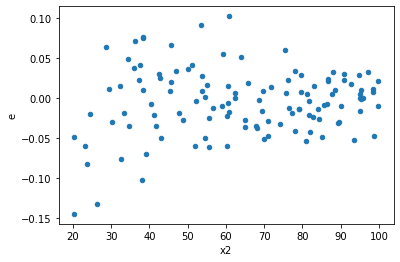

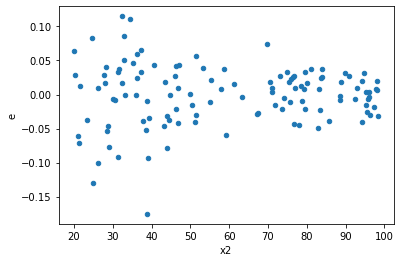

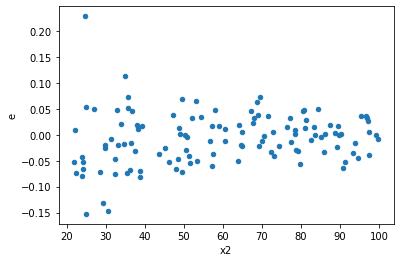

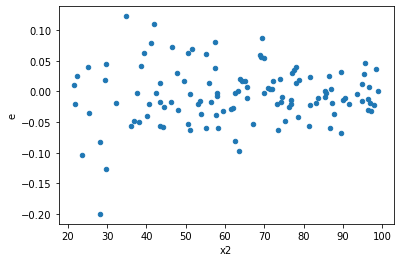

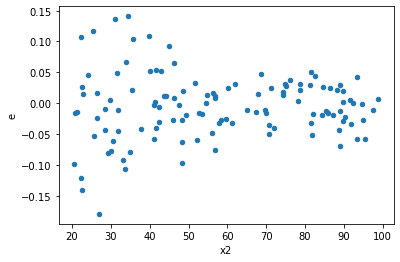

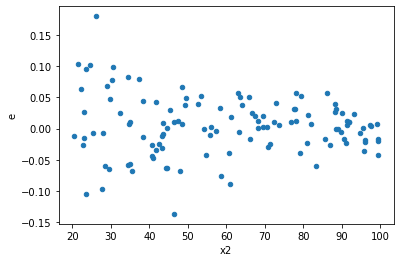

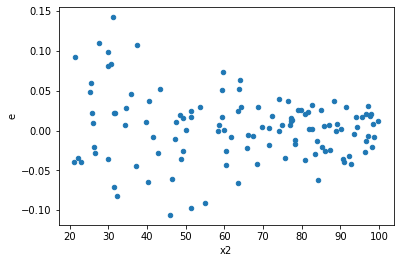

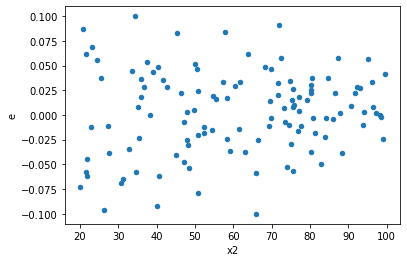

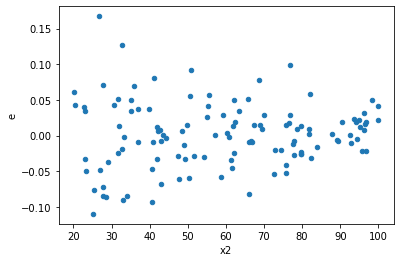

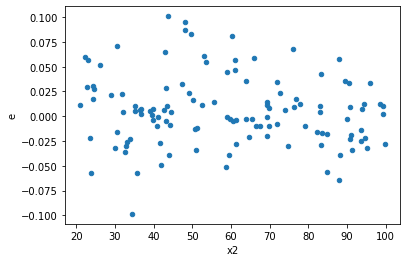

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,0.12320399813857903,0.027031343523926544,0.0027378666253017564,0.0006006965227539232,0.21940313571254294,1.2643706982688429e-06,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,0.17623405983515847,0.026403956010690836,0.003916312440781299,0.0005867545780153519,0.149823229603789,2.9185172422844426e-09,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,0.20433868583357687,0.04233279915391139,0.004540859685190597,0.0009407288700869198,0.20716977297382264,5.347736114025104e-07,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,0.167084933190428,0.03605977864308076,0.0037129985153428443,0.0008013284142906836,0.21581705755589076,9.895225411742035e-07,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,0.23173467751692964,0.04289886573785817,0.005149659500376214,0.0009533081275079594,0.18512061378782702,9.345031869446281e-08,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,0.17197403463777888,0.030469912918698903,0.003821645214172864,0.0006771091759710867,0.1771774034544011,4.6441084498268216e-08,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,0.1395914980718424,0.023923781737672952,0.0031020332904853867,0.0005316395941705101,0.17138423233598582,2.714503502170838e-08,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,0.11968395930105338,0.03947151897488109,0.0026596435400234085,0.0008771448661084686,0.32979790445931284,0.00030418519506842604,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,0.15271324657019814,0.04132058548782553,0.0033936277015599588,0.0009182352330627895,0.270576301767192,2.45253798586167e-05,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    982
Reject001=1 : Homoscedasticity       18
Name: Result_test, dtype: int64